# 二值化图像
- 二值化图像
- 图像二值化 + 高斯模糊

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## 二值化图像

In [2]:
"""产生一个图像（从白色到黑色的递增形式）"""

# 一条横线
# .arange(255, -1, -1)：stop=-1，step=-1
# .reshape(1, -1)：-1表示会自动计算数值
img = np.arange(255, -1, -1).reshape(1, -1)

for i in range(255):
    # 增加一条横线（向 img 数组的末尾添加一行新数据）
    img = np.append(img, np.arange(255, -1, -1).reshape(1, -1), axis=0)
# uint8 是 OpenCV 图像的标准格式（范围 0-255）
img = img.astype(np.uint8)

print("图像数组：\n", img, sep="")
print("\n图像的形状：\n", img.shape)

# 可视化
cv.imshow('img', img)
cv.waitKey(0)
cv.destroyAllWindows()

图像数组：
[[255 254 253 ...   2   1   0]
 [255 254 253 ...   2   1   0]
 [255 254 253 ...   2   1   0]
 ...
 [255 254 253 ...   2   1   0]
 [255 254 253 ...   2   1   0]
 [255 254 253 ...   2   1   0]]

图像的形状：
 (256, 256)


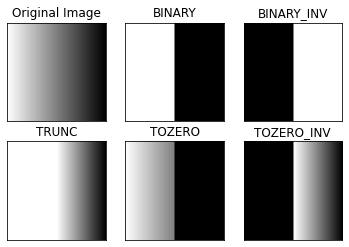

In [3]:
# 普通二值化操作，将小于等于阈值 thresh 的设置为 0，大于该值的设置为 maxval（常用）
# ret：实际使用的阈值
# thresh1：二值化后的输出图像
ret, thresh1 = cv.threshold(src=img, thresh=127, maxval=255, type=cv.THRESH_BINARY)
# ret, thresh1 = cv.threshold(src=img, thresh=50, maxval=255, type=cv.THRESH_BINARY)

# 反转的二值化操作，将小于等于阈值 thresh 的设置为 maxval，大于该值的设置为 0
ret, thresh2 = cv.threshold(src=img, thresh=127, maxval=255, type=cv.THRESH_BINARY_INV)

# 截断二值化操作，将小于等于阈值 thresh 的设置为原始值，大于该值的设置为 maxval
ret, thresh3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)

# 0 二值化操作，将小于等于阈值的设置为 0，大于该值的设置为原始值
ret, thresh4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)

# 反转 0 二值化操作，将小于等于阈值的设置为原始值，大于阈值的设置为 0
ret, thresh5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i] / 255.0, 'gray')  # 将像素值从 [0, 255] 归一化到 [0.0, 1.0]
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

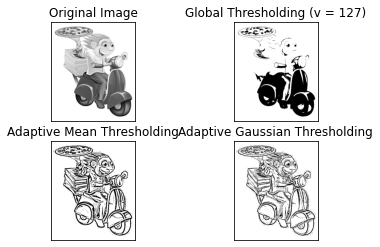

In [4]:
# NOTE: 进行自适应二值化操作
# 因为二值化操作的时候需要给定一个阈值，但是实际情况下阈值不是特别好给定的
# 所以可以基于本身的图像数据，根据当前区域的像素值获取适合的阈值对当前区域进行二值化操作

# 加载灰度图
img = cv.imread('./images/xiaoren.png', cv.IMREAD_GRAYSCALE)

# 普通二值化操作
ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# 使用均值的方式产生当前像素点对应的阈值
# 使用(x, y)像素点邻近的 blockSize * blockSize 区域的均值减去 C 的值
# 比周围颜色深的颜色会变成黑色：像素点颜色值 - (均值 - C) ≤ 0 -> 黑色
# 比周围颜色浅的颜色会变成白色：像素点颜色值 - (均值 - C) > 0 -> 白色
# C=2：C大于 0，阈值(均值 - C)变小，黑色区域变小，白色区域变大
# 突出边缘信息
th2 = cv.adaptiveThreshold(
    img, 
    maxValue=255, 
    adaptiveMethod=cv.ADAPTIVE_THRESH_MEAN_C,
    thresholdType=cv.THRESH_BINARY, 
    blockSize=11, 
    C=2
)

# 使用高斯分布（正态分布）的方式产生当前像素点对应的阈值（推荐）
# 使用(x, y)像素点邻近的 blockSize * blockSize 区域的加权均值减去 C 的值，
# 其中权重为和当前数据有关的高斯随机数（距离中心点近的，权重大；距离中心点远的，权重小）
th3 = cv.adaptiveThreshold(
    img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv.THRESH_BINARY, 11, 2
)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

### 图像二值化 + 高斯模糊

In [5]:
# 产生噪音数据
# 适合严格范围控制（从均匀分布中抽取的随机样本）
# img1 = np.random.uniform(low=0, high=255, size=(300, 300))

# 返回从正态分布中抽取的随机样本
# 适合真实数据模拟：均值 150，标准差 100
img1 = np.random.normal(150, 100, size=(300, 300))
# 裁剪
img1 = np.clip(img1, 0, 255)
img1 = img1.astype(np.uint8)

# 产生背景图像
img2 = np.zeros((300, 300), dtype=np.uint8)  # 黑色背景
img2[100:200, 100:200] = 255                 # 中间白色区域

# 合并两张图像，得到一张图像
img = cv.addWeighted(src1=img1, alpha=0.3, src2=img2, beta=0.3, gamma=0)  # gamma=0：黑色

# 可视化
cv.imshow('img1', img1)  # 噪音数据
cv.imshow('img2', img2)  # 背景图像
cv.imshow('img', img)    # 合并图像
cv.waitKey(0)
cv.destroyAllWindows()

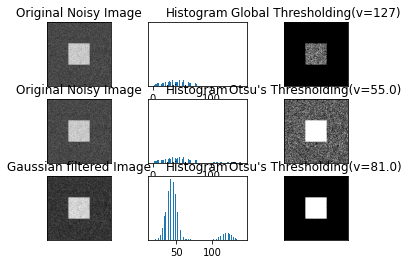

In [6]:
"""进行大津法二值化操作（其实就是找一个最大基于直方图的最大差异性的阈值点）"""

# 进行普通二值化操作
# ret：实际使用的阈值
# th1：二值化后的输出图像
ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# 进行大津法二值化操作
# cv.THRESH_OTSU：启用 Otsu 算法自动计算最优阈值
ret2, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# 做一个高斯转换后，再做大津法二值化操作
# 高斯模糊的操作
# 用一个符合高斯分布（钟形曲线）的核在图像上滑动，用于降噪或平滑图像
# ksize=(5, 5)：高斯核大小（宽度和高度，必须为奇数），小核保留更多细节，大核模糊更强
# sigmaX 和 sigmaY：如果标准差 sigmaY=0（默认），则 sigmaY = sigmaX；如果两者均为 0，则自动计算
blur = cv.GaussianBlur(src=img, ksize=(5, 5), sigmaX=0)
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# 画图
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ["Original Noisy Image", "Histogram", "Global Thresholding(v=127)",
          "Original Noisy Image", "Histogram", f"Otsu's Thresholding(v={ret2})",
          "Gaussian filtered Image", "Histogram", f"Otsu's Thresholding(v={ret3})"]

for i in range(3):
    # 原始图
    plt.subplot(3, 3, i * 3 + 1)       # 第 1 列
    plt.imshow(images[i * 3], 'gray')  # 灰度图
    plt.title(titles[i * 3]) 
    plt.xticks([])
    plt.yticks([])
    
    # 直方图
    plt.subplot(3, 3, i * 3 + 2)       # 第 2 列
    # 绘制图像的灰度直方图，用于分析图像的像素值分布
    # .ravel()：将多维数组（图像矩阵）展平为一维数组，以便统计像素值
    # 256：直方图的区间数量，表示将像素值范围 [0,255] 分成 256 个区间统计频数，每个区间对应一个灰度级
    plt.hist(images[i * 3].ravel(), 256)
    plt.title(titles[i * 3 + 1])
    # plt.xticks([]) 
    plt.yticks([])
    
    # 二值化后的图
    plt.subplot(3 , 3, i * 3 + 3)      # 第 3 列
    plt.imshow(images[i * 3 + 2], 'gray')
    plt.title(titles[i * 3 + 2]) 
    plt.xticks([])
    plt.yticks([])
plt.show()

In [7]:
# 拷贝原图
img3 = img.copy()
# 在 img3 上画 2 个正方形
cv.rectangle(img3, pt1=(40, 40), pt2=(50, 50), color=(255, 0, 0), thickness=1)
cv.rectangle(img3, pt1=(95, 110), pt2=(105, 120), color=(255, 0, 0), thickness=1)

# 图像可视化
cv.imshow("img3", img3)
cv.waitKey(0)
cv.destroyAllWindows()

In [8]:
img[40:50, 40:50]  # 原图
# img[110:120, 95:105]

array([[37, 76, 56, 40, 68, 59, 68, 11,  6, 34],
       [76,  0, 60,  6, 39, 28,  0, 18, 36,  0],
       [56, 56, 65,  0, 13, 29, 34, 50, 50, 35],
       [26,  7, 19, 46, 11, 49, 34, 57,  8, 76],
       [56, 70, 34, 76, 39, 34, 39, 34,  8, 21],
       [15, 37, 57, 76, 63, 33, 27, 76, 29, 76],
       [33, 76,  0,  0, 74, 37, 41, 58, 45, 39],
       [13, 51,  0,  0, 75, 27, 29, 37, 36, 29],
       [29, 63, 44, 28,  2, 39, 58, 76, 76, 24],
       [57, 22, 76, 46, 16, 52, 76, 73, 76, 62]], dtype=uint8)

In [9]:
blur[40:50, 40:50]  # 高斯平滑后的图像
# blur[110:120, 95:105]

array([[37, 46, 49, 48, 48, 44, 37, 31, 27, 29],
       [39, 44, 41, 36, 35, 34, 32, 30, 29, 35],
       [38, 40, 36, 30, 28, 30, 33, 34, 36, 43],
       [36, 38, 38, 36, 33, 34, 37, 37, 38, 44],
       [34, 40, 44, 46, 43, 39, 39, 38, 38, 43],
       [33, 40, 43, 47, 47, 43, 41, 42, 43, 46],
       [36, 36, 34, 36, 42, 43, 42, 45, 46, 48],
       [39, 36, 30, 29, 36, 41, 45, 49, 49, 49],
       [43, 42, 38, 32, 34, 42, 52, 58, 56, 52],
       [44, 47, 47, 41, 39, 46, 57, 61, 57, 53]], dtype=uint8)